<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

## Import Package and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/merc.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


## Data Exploration

In [ ]:
df.model.value_counts()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
200              1
180              1
220              1
230              1
Name: model, dtype: int64

In [3]:
df.drop(df[df['model'] == '180'].index,inplace = True)
df.drop(df[df['model'] == '200'].index,inplace = True)
df.drop(df[df['model'] == '220'].index,inplace = True)
df.drop(df[df['model'] == '230'].index,inplace = True)

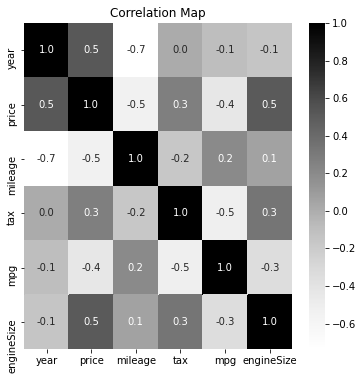

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), cmap = 'Greys',annot= True, fmt = '.1f').set_title('Correlation Map')
plt.show()

<Figure size 1080x360 with 0 Axes>

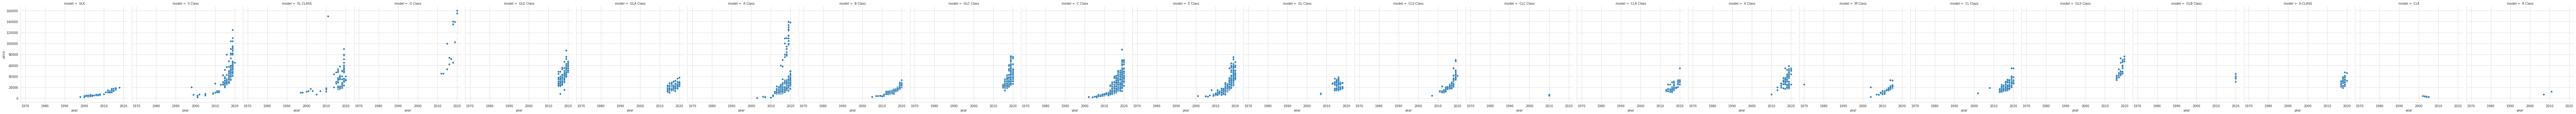

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,5))
sns.relplot(x = 'year', y = 'price', data = df, col = 'model')

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13115.000000,13115.000000,13115.000000,13115.000000,13115.000000,13115.000000
mean,2017.297217,24701.952268,21944.193519,129.948532,55.155326,2.071727
std,2.223028,11842.387282,21169.505866,65.173973,15.219694,0.572204
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6090.000000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31766.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


Text(0.5, 1.0, 'Price vs Mileage')

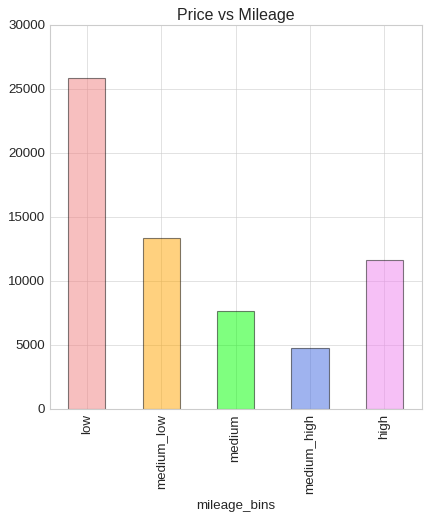

In [187]:
plt.style.use('seaborn-whitegrid')
df['mileage_bins'] = pd.cut(df.mileage, bins = 5, labels = ['low','medium_low','medium','medium_high','high'])
df.groupby('mileage_bins').mean()['price'].T.plot(kind = 'bar',figsize = (6,6), color = ['lightcoral','orange','lime','royalblue','violet'],alpha = 0.5)
plt.title('Price vs Mileage')

Text(0.5, 1.0, 'Tax vs Mileage')

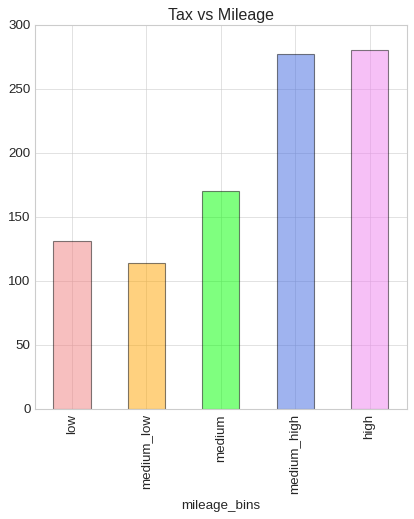

In [188]:
df.groupby('mileage_bins').mean()['tax'].T.plot(kind = 'bar',figsize = (6,6), color = ['lightcoral','orange','lime','royalblue','violet'],alpha = 0.5)
plt.title('Tax vs Mileage')

In [ ]:
df = df.drop(columns=['mileage_bins'])

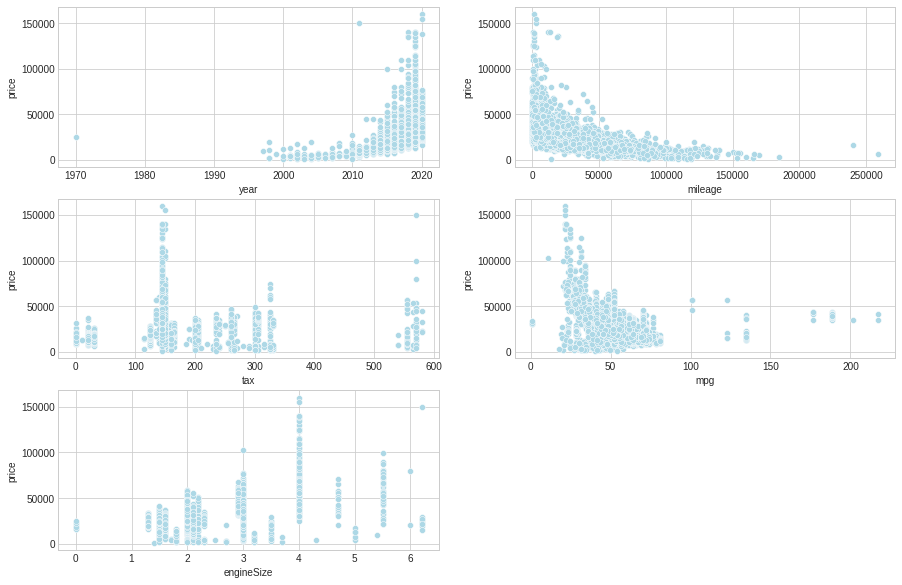

In [ ]:
int_col = df.select_dtypes(['int','float']).columns.drop('price')
plt.figure(figsize = (15,10))
for i,c in enumerate(int_col):
  plt.subplot(3,2,i+1)
  sns.scatterplot(x = c, y = 'price', data = df, color = 'lightblue')
plt.show()

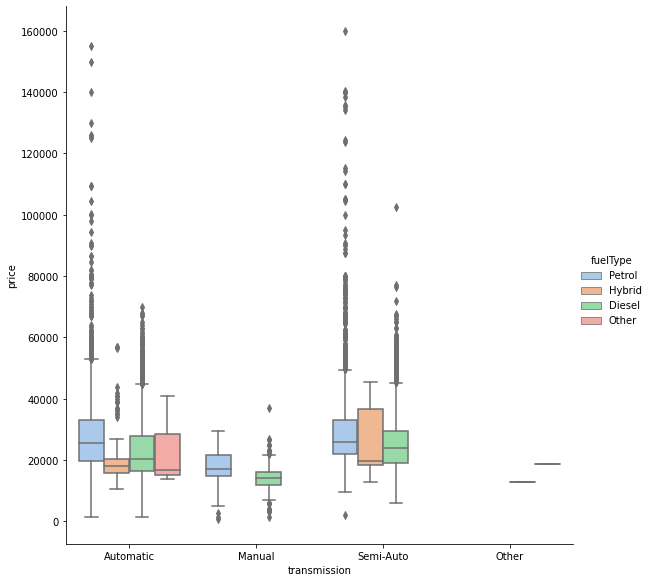

In [ ]:
sns.catplot(x = 'transmission', y = 'price', data = df,kind = 'box', hue = 'fuelType', height=8, palette='pastel')
plt.show()

## Dummy Variables

In [4]:
m = pd.get_dummies(df.model,prefix='mod')
t = pd.get_dummies(df.transmission,prefix='tran')
fue = pd.get_dummies(df.fuelType,prefix='fue')
df = pd.concat([df,m,t,fue],axis = 1).drop(columns = ['model', 'transmission', 'fuelType'])
df.head()

,year,price,mileage,tax,mpg,engineSize,mod_ A Class,mod_ B Class,mod_ C Class,mod_ CL Class,mod_ CLA Class,mod_ CLC Class,mod_ CLK,mod_ CLS Class,mod_ E Class,mod_ G Class,mod_ GL Class,mod_ GLA Class,mod_ GLB Class,mod_ GLC Class,mod_ GLE Class,mod_ GLS Class,mod_ M Class,mod_ R Class,mod_ S Class,mod_ SL CLASS,mod_ SLK,mod_ V Class,mod_ X-CLASS,tran_Automatic,tran_Manual,tran_Other,tran_Semi-Auto,fue_Diesel,fue_Hybrid,fue_Other,fue_Petrol
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [5]:
X = df.drop(columns= 'price')
y = df.price
X_columns = df.drop(columns= 'price').columns

## View Outliers

In [6]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_prime = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9999996227916775

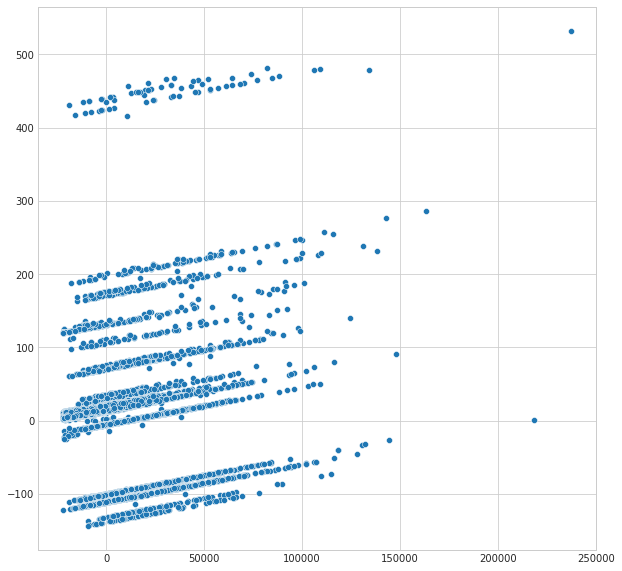

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(x = X_prime[:,0], y = X_prime[:,1])
plt.show()

In [7]:
for i in range(0,13115):
  if X_prime[i,0]>200000:
    print(i)

11343
12900


In [8]:
df = df.drop([11343,12900])

## Regression

### Statistical test

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y,x)
result = model.fit()
result.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        05:02:47   Log-Likelihood:            -1.3203e+05
No. Observations:               13115   AIC:                         2.641e+05
Df Residuals:                   13081   BIC:                         2.644e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.565e+06   4.71e+04    -54.

### Scale / split

In [9]:
import random
random.seed(200)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20) 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

Xtraintemp, Xtrain_1, ytraintemp, ytrain_1 = train_test_split(Xtrain,ytrain,test_size = 0.25) 
Xtraintemp, Xtrain_2, ytraintemp, ytrain_2 = train_test_split(Xtraintemp,ytraintemp,test_size = 0.33) 
Xtrain_4, Xtrain_3, ytrain_4, ytrain_3 = train_test_split(Xtraintemp,ytraintemp,test_size = 0.5) 

### Linear Regression

In [ ]:
def reg(xtest , xtrain , ytest , ytrain):
  from scipy.stats import probplot
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(Xtemp,ytemp)
  
  y_pred = lr.predict(xtest)
  resid = ytest - y_pred
  
  fig = plt.figure(figsize = (20,10))
  ax = fig.add_subplot(121)
  sns.scatterplot(x = range(1,len(resid)+1),y = resid,color = 'black',ax = ax).set_title('Residual Plot')
  plt.subplot(1,2,2)
  ax = fig.add_subplot(122)
  tuple_out = probplot(resid, plot=ax)
  plt.show()

  from sklearn.metrics import mean_squared_error
  return mean_squared_error(ytest,y_pred)


#### Evaluate test model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


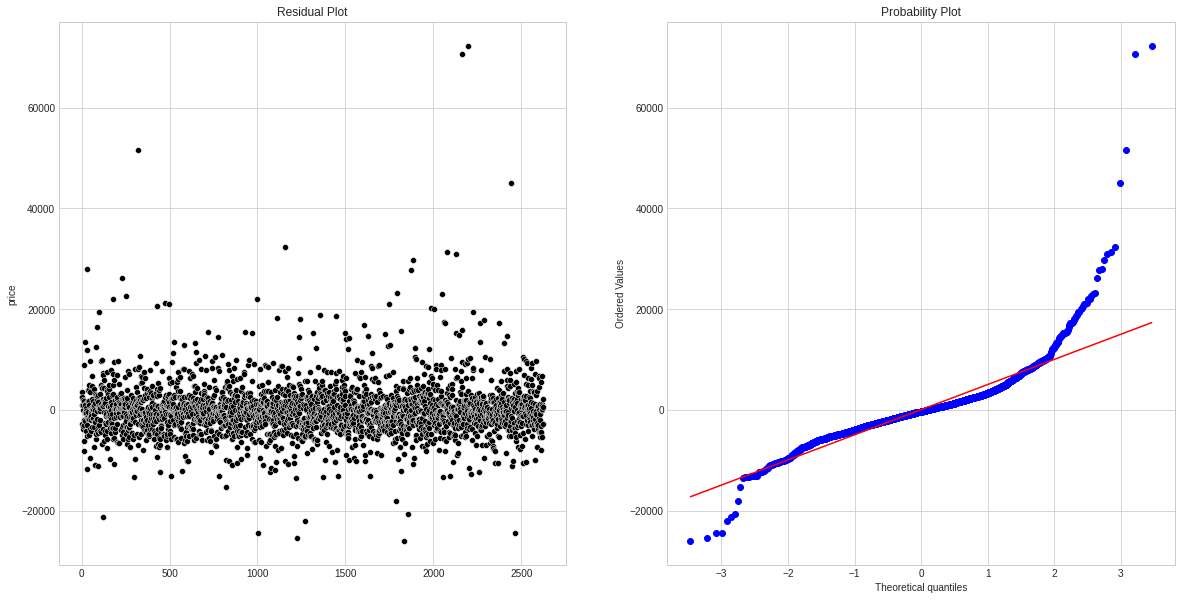

30437260.54230687

In [ ]:
reg_CV(xtest = Xtest, xtrain = [Xtrain], ytest = ytest, ytrain = [ytrain])

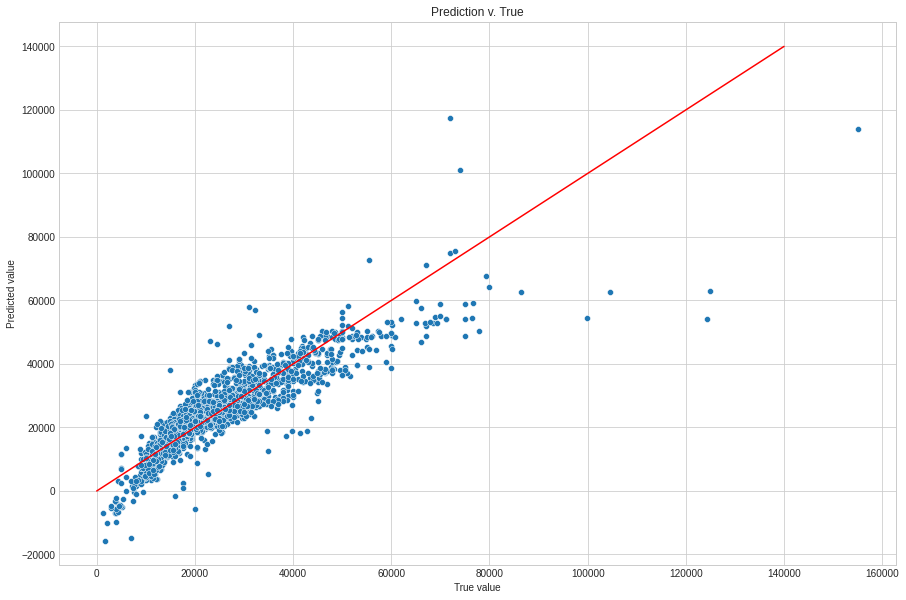

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain) 
y_pred_ols = lr.predict(Xtest)

plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_ols, x = ytest, palette='pastel')
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [169]:
# root mean square error
print(np.sqrt(((ytest - y_pred_ols)**2).mean()))
result_rmse = {}
result_rmse['OLS'] = np.sqrt(((ytest - y_pred_ols)**2).mean())

5516.939488118547


In [18]:
# R-squared
from sklearn.metrics import r2_score
print(r2_score(ytest, y_pred_ols))
result_r2 = {}
result_r2['OLS'] = r2_score(ytest, y_pred_ols)

0.77927543961817


### SVM

#### CV

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
svm_est =Pipeline([('svc',OneVsRestClassifier(SVR()))])

Cs = [0.1, 1, 10]
gammas = [0.001, 0.01, 0.1]
param_grid = dict(svc__estimator__gamma=gammas,svc__estimator__C=Cs)
from sklearn.model_selection import RandomizedSearchCV
rand_grid = RandomizedSearchCV(svm_est,
                               param_distributions=param_grid,
                               cv=2,n_iter=2,scoring='neg_mean_absolute_error')
rand_grid.fit(Xtrain_3, ytrain_3)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('svc',
                                              OneVsRestClassifier(estimator=SVR(C=1.0,
                                                                                cache_size=200,
                                                                                coef0=0.0,
                                                                                degree=3,
                                                                                epsilon=0.1,
                                                                                gamma='scale',
                                                                                kernel='rbf',
                                                                                max_iter=-1,
                                                                                shrinking=True,
                   

In [ ]:
rand_grid.best_params_

{'svc__estimator__C': 10, 'svc__estimator__gamma': 0.01}

#### Evaluate test model

In [19]:
svr = SVR(C = 10, gamma = 0.01)
svr.fit(Xtrain, ytrain)
y_pred_svr = svr.predict(Xtest)

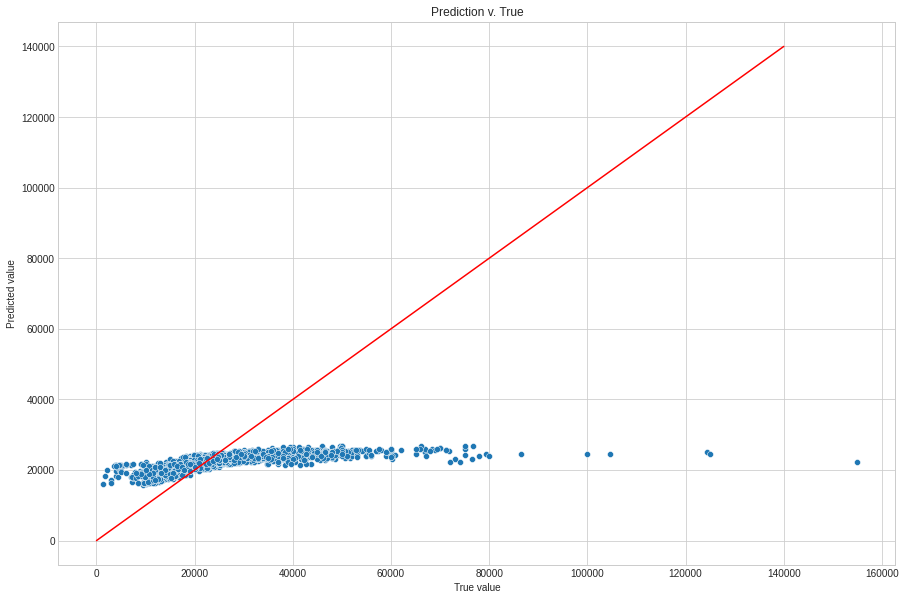

In [54]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_svr, x = ytest)
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [170]:
# root mean square error
print(np.sqrt(((ytest - y_pred_svr)**2).mean()))
result_rmse['SVR'] = np.sqrt(((ytest - y_pred_svr)**2).mean())

10699.657517308307


In [55]:
# R-squared
print(r2_score(ytest, y_pred_svr))
result_r2['SVR'] = r2_score(ytest, y_pred_svr)

0.16977850586272814


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(dtr, param_grid = {'max_depth':[5,10,20,30,40,50],'min_samples_leaf' :[1,3,5]},cv=10)
gs_inst.fit(Xtrain, ytrain)
gs_inst.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Evaluate test model

In [24]:
dtr = DecisionTreeRegressor(max_depth=30, min_samples_leaf=1)
dtr.fit(Xtrain, ytrain)
y_pred_tree = dtr.predict(Xtest)

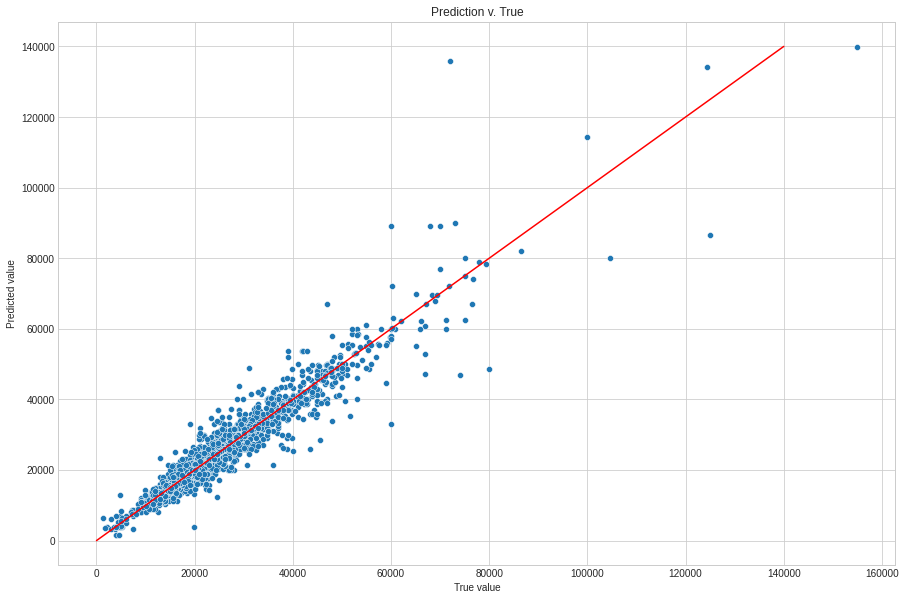

In [57]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_tree, x = ytest)
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [171]:
# root mean square error
print(np.sqrt(((ytest - y_pred_tree)**2).mean()))
result_rmse['tree'] = np.sqrt(((ytest - y_pred_tree)**2).mean())

3577.969759197414


In [25]:
# R-squared
print(r2_score(ytest, y_pred_tree))
result_r2['tree'] = r2_score(ytest, y_pred_tree)

0.9071616205925299


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(rft, param_grid = {'n_estimators':[10,50,100]},cv=10)
gs_inst.fit(Xtrain_4, ytrain_4)
gs_inst.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Evaluate test model

In [26]:
rft = RandomForestRegressor(n_estimators = 100)
rft.fit(Xtrain, ytrain)
y_pred_forest = rft.predict(Xtest)

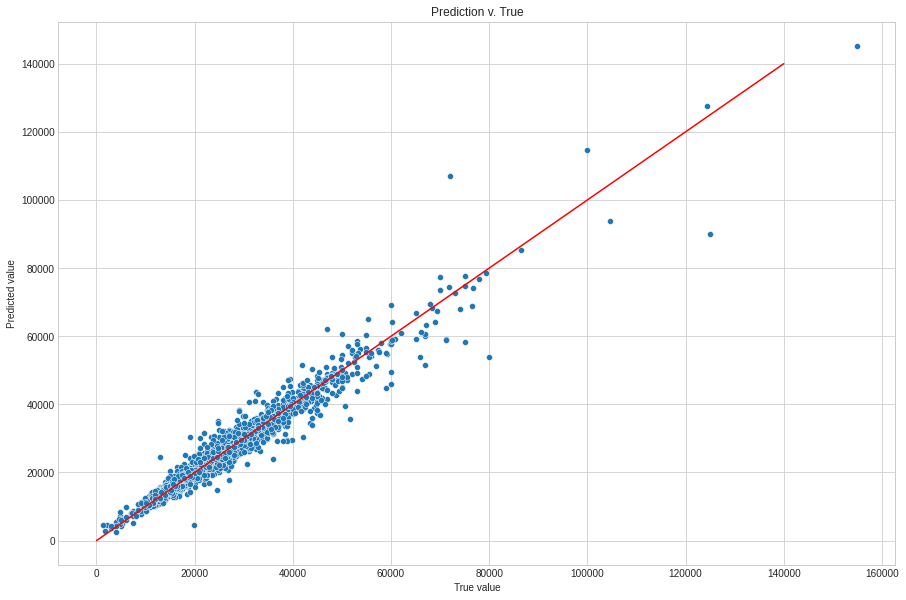

In [58]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_forest, x = ytest)
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [172]:
# root mean square error
print(np.sqrt(((ytest - y_pred_forest)**2).mean()))
result_rmse['forest'] = np.sqrt(((ytest - y_pred_forest)**2).mean())

2612.8404620464303


In [31]:
# R-squared
print(r2_score(ytest, y_pred_forest))
result_r2['forest'] = r2_score(ytest, y_pred_forest)

0.9504914729912423


### KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
gs_knn = GridSearchCV(knn, param_grid = {'n_neighbors':[3,5,10]},cv=5)
gs_knn.fit(Xtrain, ytrain)
gs_knn.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

#### Evaluate test model

In [39]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(Xtrain,ytrain)
y_pred_knn = knn.predict(Xtest)

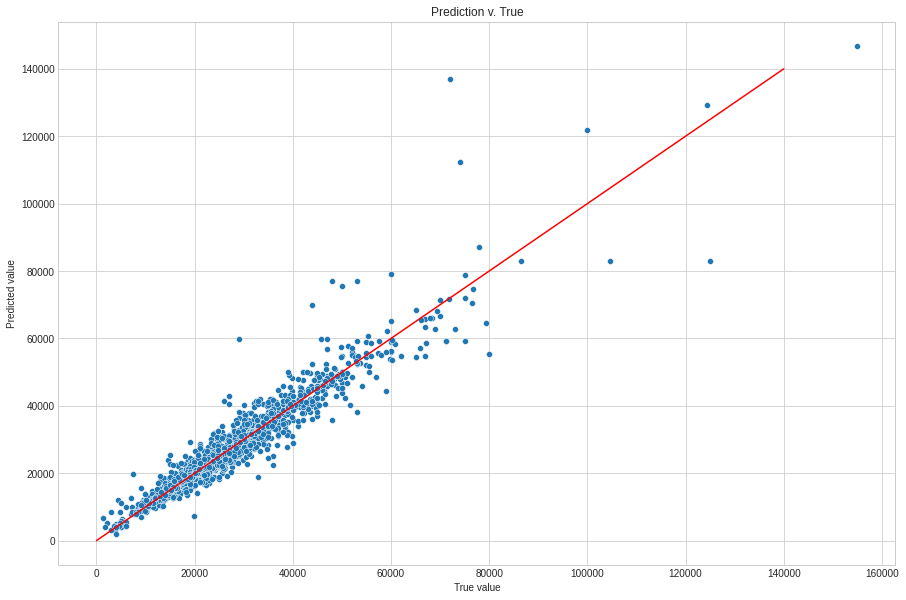

In [59]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_knn, x = ytest)
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [173]:
# root mean square error
print(np.sqrt(((ytest - y_pred_knn)**2).mean()))
result_rmse['knn'] = np.sqrt(((ytest - y_pred_knn)**2).mean())

3453.971956338455


In [42]:
# R-squared
print(r2_score(ytest, y_pred_knn))
result_r2['knn'] = r2_score(ytest, y_pred_knn)

0.9134849160070685


### Boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param = {'max_features' : ['log2',1.0],
             'max_depth' : [3, 5, 7, 10],
             'min_samples_leaf' : [2, 3, 5],
             'n_estimators': [50, 100],
             'learning_rate' : [0.001,0.01,0.05,0.1],
             'loss' : ['ls','huber']
             }

gs_boost = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),param_distributions = param,
                                cv=3,n_iter = 10, n_jobs=-1)
gs_boost.fit(Xtrain_4, ytrain_4)
gs_boost.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

#### Evaluate test model

In [64]:
boost = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)
boost.fit(Xtrain,ytrain)
y_pred_boost = boost.predict(Xtest)

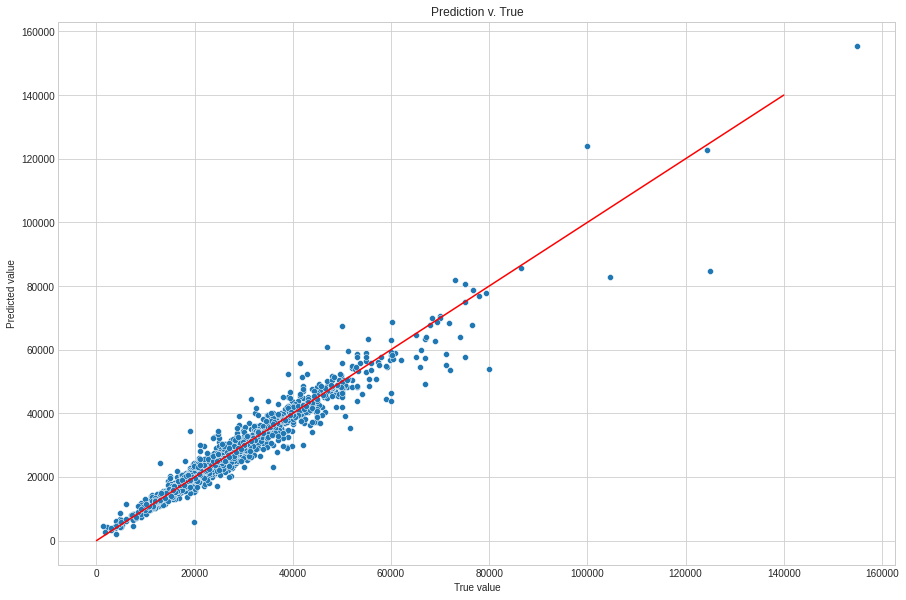

In [67]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_boost, x = ytest)
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [174]:
# root mean square error
print(np.sqrt(((ytest - y_pred_boost)**2).mean()))
result_rmse['boosting'] = np.sqrt(((ytest - y_pred_boost)**2).mean())

2672.0805595562415


In [71]:
# R-squared
print(r2_score(ytest, y_pred_boost))
result_r2['boosting'] = r2_score(ytest, y_pred_boost)

0.9482210410612951


### Neural Network

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
model = Sequential()
model.add(Dense(35,activation = 'relu'))
model.add(Dense(35,activation = 'relu'))
model.add(Dense(35,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')
earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 10)
model.fit(x = Xtrain, y = ytrain, validation_data=(Xtest,ytest), epochs = 300,callbacks = [earstop])

Epoch 1/300
328/328 [==============================] - 1s 2ms/step - loss: 722656333.4225 - val_loss: 639603008.0000
Epoch 2/300
328/328 [==============================] - 0s 1ms/step - loss: 503237940.5228 - val_loss: 93366888.0000
Epoch 3/300
328/328 [==============================] - 0s 1ms/step - loss: 71774276.5228 - val_loss: 36114092.0000
Epoch 4/300
328/328 [==============================] - 0s 1ms/step - loss: 38838065.0517 - val_loss: 28145638.0000
Epoch 5/300
328/328 [==============================] - 0s 1ms/step - loss: 31351367.1976 - val_loss: 25000934.0000
Epoch 6/300
328/328 [==============================] - 0s 1ms/step - loss: 28625803.6201 - val_loss: 22947244.0000
Epoch 7/300
328/328 [==============================] - 0s 1ms/step - loss: 22331800.9666 - val_loss: 21491482.0000
Epoch 8/300
328/328 [==============================] - 0s 1ms/step - loss: 26427006.5532 - val_loss: 20506154.0000
Epoch 9/300
328/328 [==============================] - 0s 1ms/step - loss: 22

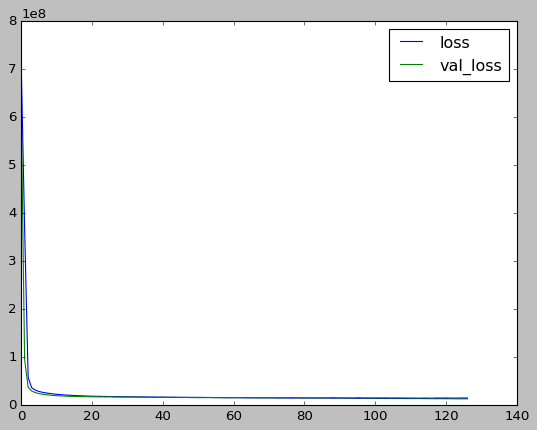

In [140]:
plt.style.use('classic')
loss = pd.DataFrame(model.history.history)
loss.plot()

In [141]:
pred = model.predict(Xtest)

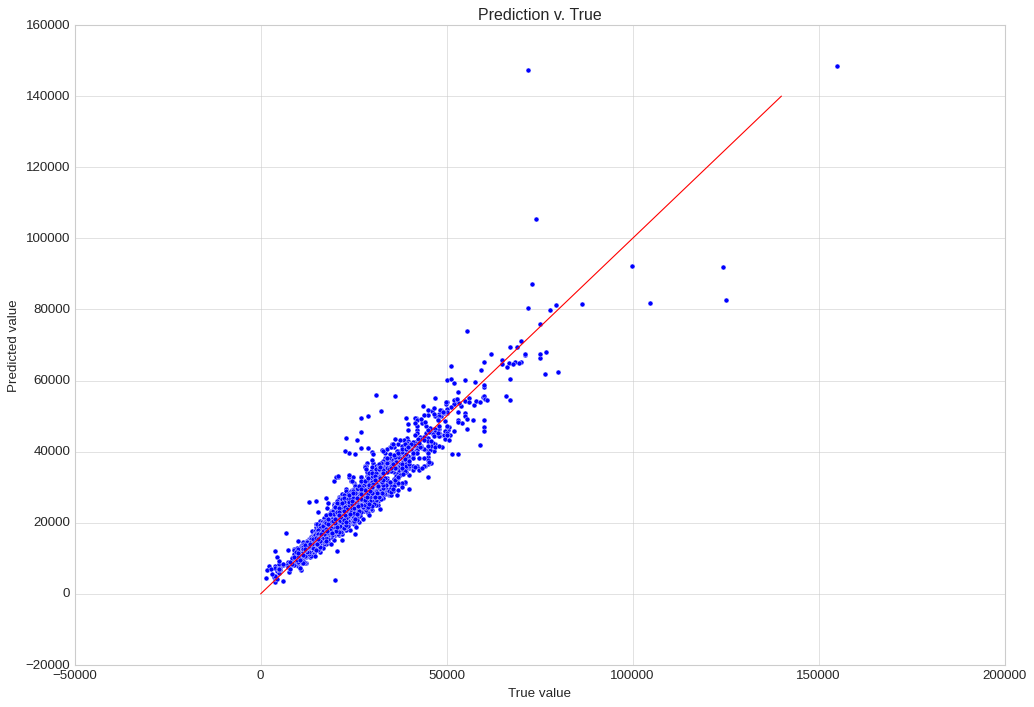

In [145]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,10))
sns.scatterplot(y = pred[:,0], x = ytest)
sns.lineplot(x = range(1,140000), y = range(1,140000), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [175]:
# root mean square error
print(np.sqrt(((ytest - pred[:,0])**2).mean()))
result_rmse['neural_net'] = np.sqrt(((ytest - pred[:,0])**2).mean())

3729.808734647252


In [143]:
# R-squared
print(r2_score(pred[:,0], ytest))
result_r2['neural_net'] = r2_score(pred[:,0], ytest)

0.896662924606977


## Conclusion

In [177]:
result_r2 = pd.DataFrame(result_r2,index=[0])
result_rmse = pd.DataFrame(result_rmse,index=[0])

Text(0.5, 1.0, 'R-squared')

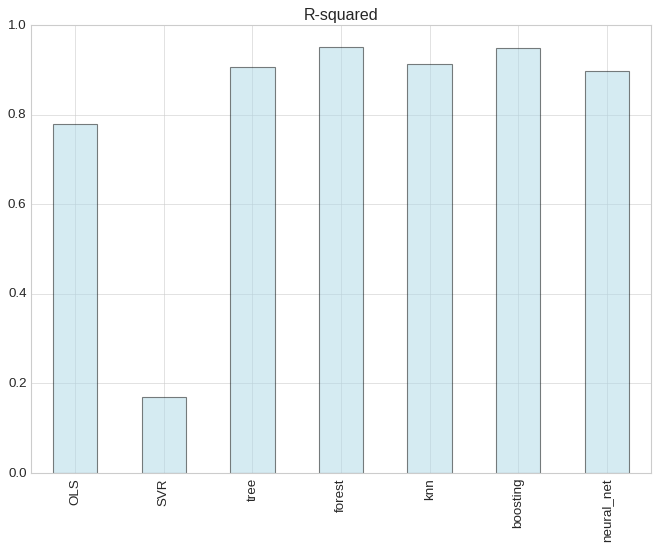

In [183]:
result_r2.T.plot(kind = 'bar',color = 'lightblue',alpha = 0.5, legend = False,figsize = (10,7)).set_title('R-squared')

Text(0.5, 1.0, 'Root Mean Square Error')

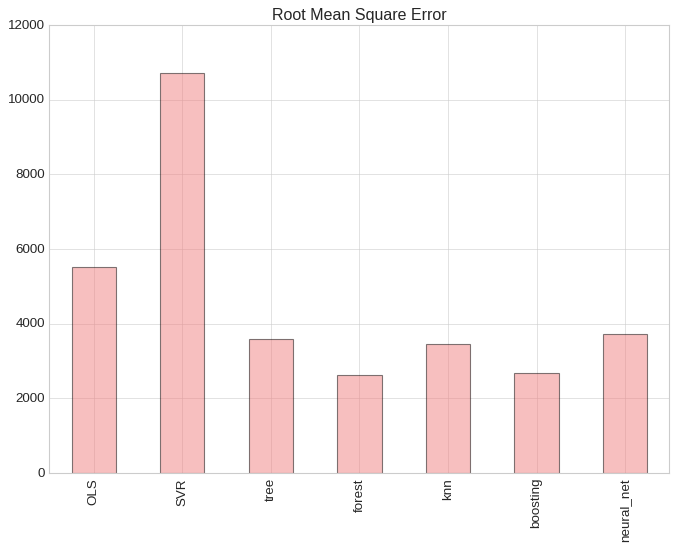

In [184]:
result_rmse.T.plot(kind = 'bar',color = 'lightcoral',alpha = 0.5, legend = False,figsize = (10,7)).set_title('Root Mean Square Error')